In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
titanic_df=pd.read_csv('Data/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [8]:
titanic_df=titanic_df.dropna()

In [9]:
titanic_df.shape

(712, 8)

In [10]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

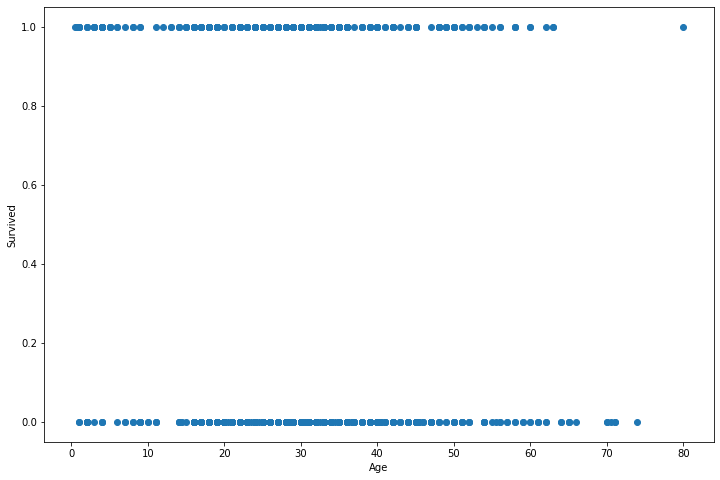

In [16]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

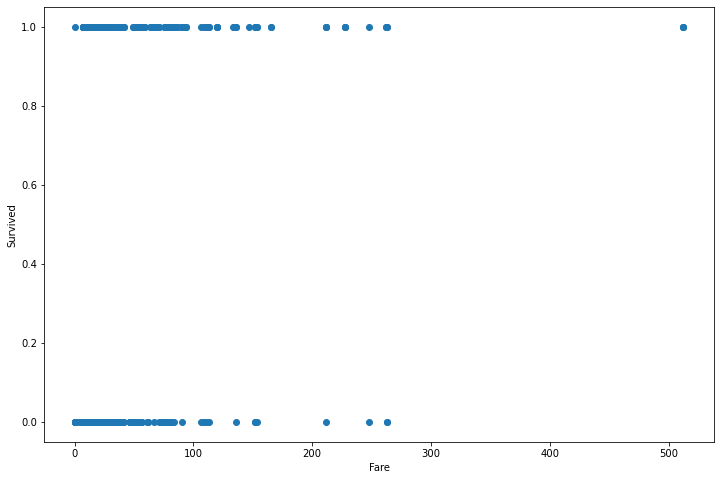

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Fare'],titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [20]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [21]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [22]:
titanic_data_corr=titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

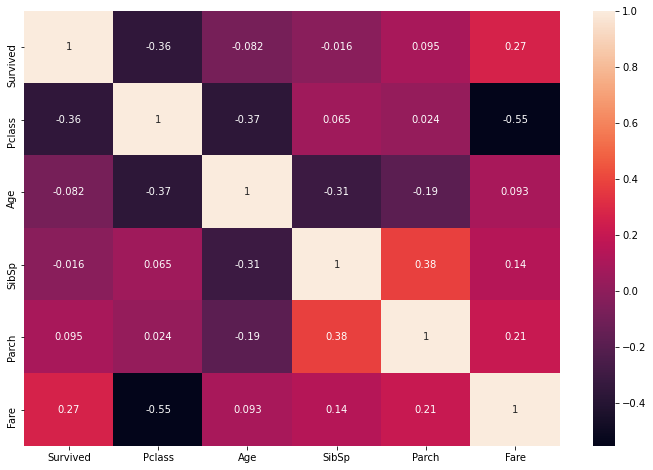

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(titanic_data_corr,annot=True)

In [25]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
titanic_df['Sex']=label_encoding.fit_transform(titanic_df['Sex'].astype(str))
titanic_df.head()

<ipython-input-25-8dc9659f3927>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Sex']=label_encoding.fit_transform(titanic_df['Sex'].astype(str))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [26]:
label_encoding.classes_

array(['0', '1'], dtype=object)

In [28]:
titanic_df=pd.get_dummies(titanic_df,columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X=titanic_df.drop('Survived',axis=1)
Y=titanic_df['Survived']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,0,0,7.7958,0,0,1
1,1,1,45.0,1,0,83.4750,0,0,1
2,3,1,25.0,0,0,7.0500,0,0,1
3,2,1,35.0,0,0,10.5000,0,0,1
4,2,0,19.0,1,0,26.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
707,2,1,25.0,0,0,13.0000,0,0,1
708,3,0,15.0,0,0,8.0292,0,1,0
709,2,1,23.0,0,0,15.0458,1,0,0
710,3,0,2.0,0,1,12.2875,0,0,1


In [33]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
707    0
708    1
709    0
710    1
711    1
Name: Survived, Length: 712, dtype: int64

In [34]:
x_train.shape,y_train.shape

((569, 9), (569,))

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

In [36]:
y_pred=logistic_model.predict(x_test)

In [37]:
pred_results=pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

pred_results.head()

,y_test,y_pred
108,0,0
469,1,1
39,0,1
37,0,0
172,0,0


In [38]:
titanic_crosstab=pd.crosstab(pred_results.y_pred,pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,70,21
1,9,43


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)


print("accuracy_score : ",acc)
print("precision_score : ",prec)
print("recall_score : ",recall)

accuracy_score :  0.7902097902097902
precision_score :  0.8269230769230769
recall_score :  0.671875


In [40]:
TP=titanic_crosstab[1][1]
TN=titanic_crosstab[0][0]
FP=titanic_crosstab[0][1]
FN=titanic_crosstab[1][0]


In [42]:
accuracy_score_verified=(TP+TN)/(TP+TN+FP+FN)
accuracy_score_verified

0.7902097902097902

In [44]:
precision_score_verified=TP/(TP+FP)
precision_score_verified

0.8269230769230769

In [45]:
recall_score_verified=TP/(TP+FN)
recall_score_verified

0.671875